# Example of upper limit computation.

In [1]:
from statnight import Hypothesis, Observable, Model, Constant, Variable
from statnight.calculators import AsymptoticCalculator
from statnight.utils.pdf import Gaussian, gaussian, exponential
from scipy.stats import expon
from statnight.utils.stats import integrate1d
import numpy as np
import matplotlib.pyplot as plt
import iminuit
import math
import papermill as pm

## Background only fit, from external measurement or other region:

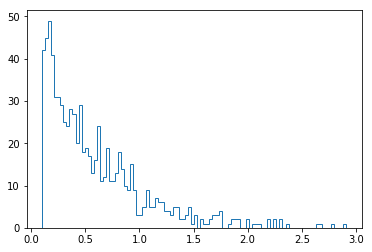

In [2]:
#background only
np.random.seed(10)
tau = 2.0
beta = 1./tau
data = np.random.exponential(beta, 1000)

bounds = (0.1,3.0)

data = data[(data > bounds[0]) & (data < bounds[1])]
plt.hist(data, bins=100, histtype='step');

In [3]:
def exp_normalized(x, tau):
    ret = exponential(x, tau)
    norm = exponential.integrate(bounds, 100, tau)
    return ret/norm

model_bkg = Model(exp_normalized)
model_bkg.add_obs(Observable("x", range = bounds))

tau = Variable("tau",   range=(0.1, 5.0), initvalue=0.5,       initstep=0.05)
model_bkg.add_vars(tau)

lh_bkg = model_bkg.nll_function(data)

params = tau.tominuit()

minuit_bkg = iminuit.Minuit(lh_bkg, pedantic=True, errordef=0.5, **params)

minuit_bkg.migrad();

FCN = 222.3887194852312 
 TOTAL NCALL = 25 
 NCALLS = 25 
 
 
 EDM = 1.488886290787599e-10 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,tau,2.02224,0.0750417,,,0.1,5,No


## Signal + background fit:

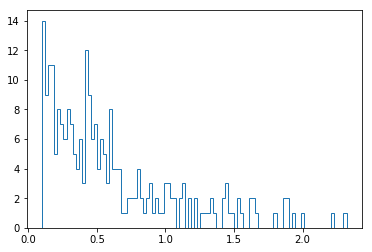

In [4]:
# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 4)
data = np.concatenate((data,peak))
data = data[(data > 0.1) & (data < 3)]

plt.hist(data, bins=100, histtype='step');

In [5]:
def gauss_normalized(x, mu, sigma):  
    ret = gaussian(x, mu, sigma)
    norm = gaussian.integrate(bounds, 100, mu, sigma)
    return ret/ norm

def exp_extended(x, tau, Nbkg):  
    ret = exp_normalized(x, tau)
    return ret * Nbkg

def gauss_extended(x, mu, sigma, Nsig):  
    ret = gauss_normalized(x, mu, sigma)
    return ret * Nsig

def totpdf(x, mu, sigma, Nsig, tau, Nbkg):
    ret  = gauss_extended(x, mu, sigma, Nsig)
    ret += exp_extended(x, tau, Nbkg)
    return ret

model_sb = Model(totpdf)

model_sb.add_obs(Observable("x", range = bounds))

mean  = Constant("mu",  value=1.2)
sigma = Constant("sigma", value= 0.1)
Nsig  = Variable("Nsig",  range=(-10,len((data))),   initvalue= 0.0,       initstep=1.0)
tau_constraint = Gaussian(mean = minuit_bkg.values["tau"], sigma = minuit_bkg.errors["tau"])
tau   = Variable("tau",   range=(0.1, 5.0), initvalue=0.5, initstep=0.05, constraint=tau_constraint)
Nbkg  = Variable("Nbkg",  range=(0,len((data))*1.1), initvalue= len(data), initstep=1.0)

model_sb.add_vars([mean, sigma, Nsig, tau, Nbkg])

model_sb.add_ext_pars(["Nsig","Nbkg"])

In [6]:
lh_sb = model_sb.nll_function(data)

params = {}
for v in model_sb.variables:
    params.update(v.tominuit())

minuit_sb = iminuit.Minuit(lh_sb, pedantic=True, errordef=0.5, **params)

minuit_sb.migrad();

FCN = -1216.0682282102966 
 TOTAL NCALL = 72 
 NCALLS = 72 
 
 
 EDM = 2.778398017117409e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mu,1.2,1,,,,,Yes
1,sigma,0.1,1,,,,,Yes
2,Nsig,-10,3.75802,,,-10,250,No
3,tau,0.1,0.0041683,,,0.1,5,No
4,Nbkg,258.675,15.5447,,,0,275,No


In [7]:
def plotfitresult(pdf, bounds, nbins, *args):
    x = np.linspace(bounds[0], bounds[1], nbins)
    bin_centers = x[:-1] + np.diff(x)/2.
    y = np.zeros(bin_centers.shape)
    
    for i in range(nbins-1):
        y[i] = integrate1d(pdf, (x[i],x[i+1]), 100, *args)
        
    plt.plot(bin_centers, y, "-r")      

In [8]:
minuit_sb.values

<ValueView of Minuit at 7fc07681cb18>
  mu: 1.2
  sigma: 0.1
  Nsig: -9.999997920610873
  tau: 0.10000000001189967
  Nbkg: 258.6754350032937

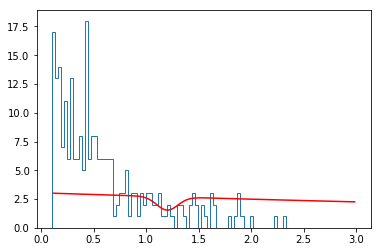

In [9]:
nbins = 100
fit_result = minuit_sb.values.values()
plt.hist(data, bins=nbins, histtype='step', range=bounds);
plotfitresult(totpdf, bounds, nbins, *fit_result)


## Upper limit:

In [10]:
null_hypothesis = model_sb.create_hypothesis({"Nsig":np.linspace(0.1, 12, 60)})

In [11]:
null_hypothesis.summary()

Observables: ['x']
Paramaters of interest: {'Nsig': array([ 0.1       ,  0.30169492,  0.50338983,  0.70508475,  0.90677966,
        1.10847458,  1.31016949,  1.51186441,  1.71355932,  1.91525424,
        2.11694915,  2.31864407,  2.52033898,  2.7220339 ,  2.92372881,
        3.12542373,  3.32711864,  3.52881356,  3.73050847,  3.93220339,
        4.13389831,  4.33559322,  4.53728814,  4.73898305,  4.94067797,
        5.14237288,  5.3440678 ,  5.54576271,  5.74745763,  5.94915254,
        6.15084746,  6.35254237,  6.55423729,  6.7559322 ,  6.95762712,
        7.15932203,  7.36101695,  7.56271186,  7.76440678,  7.96610169,
        8.16779661,  8.36949153,  8.57118644,  8.77288136,  8.97457627,
        9.17627119,  9.3779661 ,  9.57966102,  9.78135593,  9.98305085,
       10.18474576, 10.38644068, 10.58813559, 10.78983051, 10.99152542,
       11.19322034, 11.39491525, 11.59661017, 11.79830508, 12.        ])}
Nuisance parameters: ['mu', 'sigma', 'tau', 'Nbkg']
Extended parameters: ['Nsig', 

In [12]:
alt_hypothesis = model_sb.create_hypothesis({"Nsig":0})

In [13]:
alt_hypothesis.summary()

Observables: ['x']
Paramaters of interest: {'Nsig': 0}
Nuisance parameters: ['mu', 'sigma', 'tau', 'Nbkg']
Extended parameters: ['Nsig', 'Nbkg']



In [14]:
calc = AsymptoticCalculator(null_hypothesis, alt_hypothesis, data)
calc.qtilde = False
calc.CLs = True
calc.bestfitpoi = minuit_sb.values["Nsig"]

In [15]:
ul = calc.upperlimit()

Get fit best values for nuisance parameters for alternative hypothesis!


FCN = -1213.3540703745816 
 TOTAL NCALL = 33 
 NCALLS = 33 
 
 
 EDM = 3.815673938039015e-09 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,mu,1.2,1,,,,,Yes
1,sigma,0.1,1,,,,,Yes
2,Nsig,0,1,,,-10,250,Yes
3,tau,0.1,0.00408006,,,0.1,5,No
4,Nbkg,250.001,15.7063,,,0,275,No


Observed upper limit: Nsig = 6.172518359769821
Expected upper limit: Nsig = 12.456764437192062
Expected upper limit +1 sigma: Nsig = 17.332920021632344
Expected upper limit -1 sigma: Nsig = 8.974084071796913
Expected upper limit +2 sigma: Nsig = 23.236006516890466
Expected upper limit -2 sigma: Nsig = 6.684596997555435


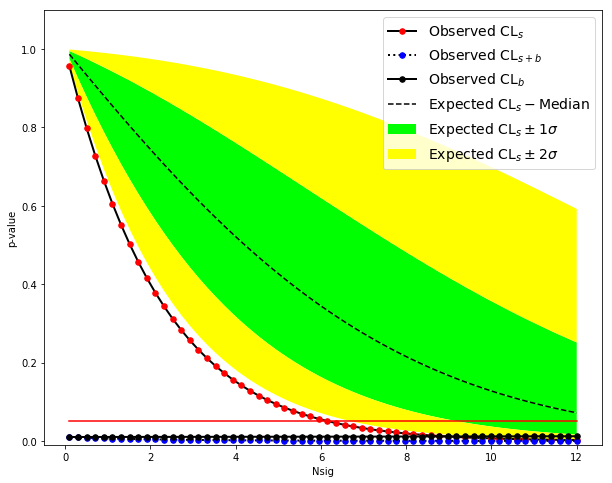

In [16]:
calc.plot()

In [17]:
pm.record("obs_ul_nsig", ul["observed"])
pm.record("exp_ul_nsig", ul["median"])
pm.record("exp_ul_nsig_p1sigma", ul["band_p1"])
pm.record("exp_ul_nsig_m1sigma", ul["band_m1"])